In [ ]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Specify the column names
col_pos_train = ['ID', 'Species', 'Kingdom', 'Length', 'Cleavage', 'Set']
col_neg_train = ['ID', 'Species', 'Kingdom', 'Length', 'Transmembrane', 'Set']
col_pos_bench = ['ID', 'Species', 'Kingdom', 'Length', 'Cleavage']
col_neg_bench = ['ID', 'Species', 'Kingdom', 'Length', 'Transmembrane']

# Load the TSV file into a DataFrame
pos_train = pd.read_csv('pos-train.tsv', sep='\t', header=None, names=col_pos_train)
neg_train = pd.read_csv('neg-train.tsv', sep='\t', header=None, names=col_neg_train)
pos_bench = pd.read_csv('pos-bench.tsv', sep='\t', header=None, names=col_pos_bench)
neg_bench = pd.read_csv('neg-bench.tsv', sep='\t', header=None, names=col_neg_bench)

# Concatenate the positive and negative datasets
train_df = pd.concat([pos_train, neg_train], axis=0)
train_df['Class'] = train_df['Cleavage'].isna()
train_df['Class'] = train_df['Class'].replace({True: 'Negative', False: 'Positive'})
bench_df = pd.concat([pos_bench, neg_bench], axis=0)
bench_df['Class'] = bench_df['Cleavage'].isna()
bench_df['Class'] = bench_df['Class'].replace({True: 'Negative', False: 'Positive'})

# Display the first few rows of the DataFrame
#print(pos_train.head())
#print(neg_train.head())
#print(pos_bench.head())
#print(neg_bench.head())
#print(bench_df.tail())

# Define the palette for the plots
custom_palette=['blue','lime','cyan','pink','purple','magenta', '#7FFFD4', '#550A35']

1. Distribution of protein length
(2 plots: one for the training set and one for the bench set, in each you compare pos and neg).


<ipython-input-4-9f86e72140de>:6: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, kde=True, x='Length', hue='Class', stat='density', common_norm=False, palette=custom_palette)


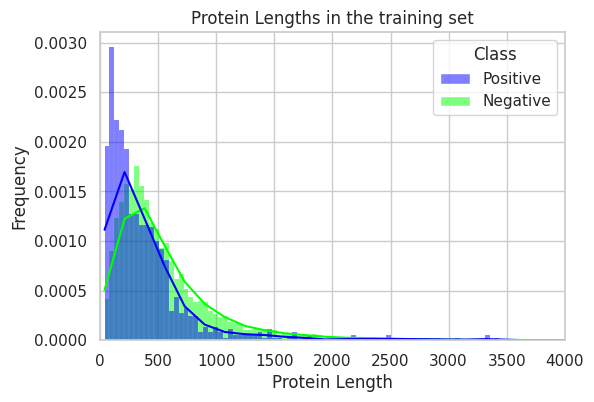

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the distribution of protein lengths
plt.figure(figsize=(6, 4))
sns.histplot(train_df, kde=True, x='Length', hue='Class', stat='density', common_norm=False, palette=custom_palette)
#stat=density --> to normalize the data otherwise they will be not comparable

# Add title and labels
plt.title('Protein Lengths in the training set')
plt.xlabel('Protein Length')
plt.ylabel('Frequency')
plt.xlim(0, 4000) #to see a good graph and avoid displaying very long neg proteins

# Show the plot
plt.show()

<ipython-input-5-42e68e444691>:6: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(bench_df, kde=True, x='Length', hue='Class', stat='density', common_norm=False, palette=custom_palette)


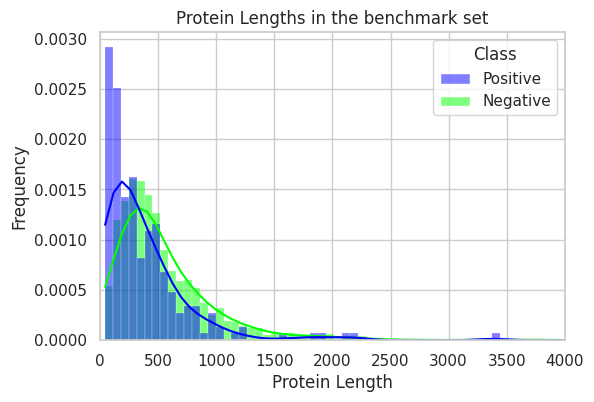

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the distribution of protein lengths
plt.figure(figsize=(6, 4))
sns.histplot(bench_df, kde=True, x='Length', hue='Class', stat='density', common_norm=False, palette=custom_palette)

# Add title and labels
plt.title('Protein Lengths in the benchmark set')
plt.xlabel('Protein Length')
plt.ylabel('Frequency')
plt.xlim(0, 4000)

# Show the plot
plt.show()

<ipython-input-6-abfebf6d6f5a>:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(y='Length', hue='Class', data=train_df, palette=custom_palette)


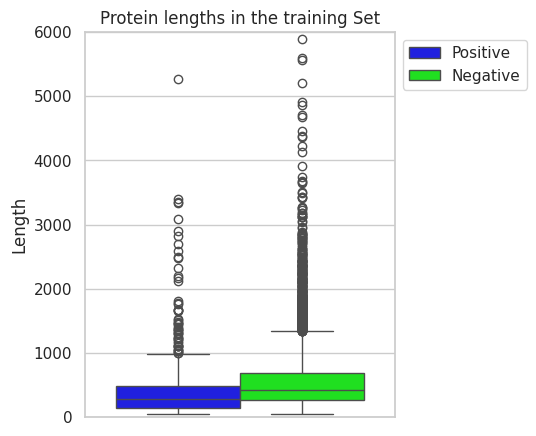

<ipython-input-6-abfebf6d6f5a>:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(y='Length', hue='Class', data=bench_df, palette=custom_palette)


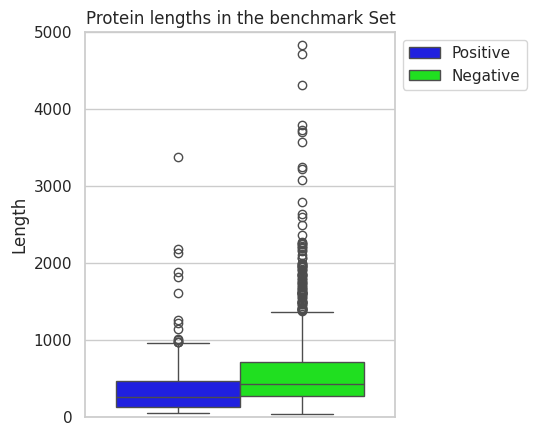

In [ ]:
#boxplot 1
plt.figure(figsize=(4, 5))
sns.boxplot(y='Length', hue='Class', data=train_df, palette=custom_palette)

# Add title and labels
plt.title('Protein lengths in the training Set')
plt.ylim(0, 6000)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#boxplot 2
plt.figure(figsize=(4, 5))
sns.boxplot(y='Length', hue='Class', data=bench_df, palette=custom_palette)

# Add title and labels
plt.title('Protein lengths in the benchmark Set')
plt.ylim(0, 5000)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Analyze the properties of the SP such as length and composition of the SP


2. Distribution of SP length in the train and in the benchmark

In [ ]:
# Concatenate the positive sets
df_sp_l = pd.concat([pos_train, pos_bench], axis=0)
#print(df_sp_l.tail())
df_sp_l['Class']=df_sp_l['Set'].isna()
df_sp_l['Class']=df_sp_l['Class'].replace({True: 'Benchmark', False: 'Training'})

<ipython-input-8-74c363bacd0c>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.histplot(df_sp_l, kde=True, stat='density', common_norm=False, x='Cleavage', hue='Class', palette=custom_palette[4:])


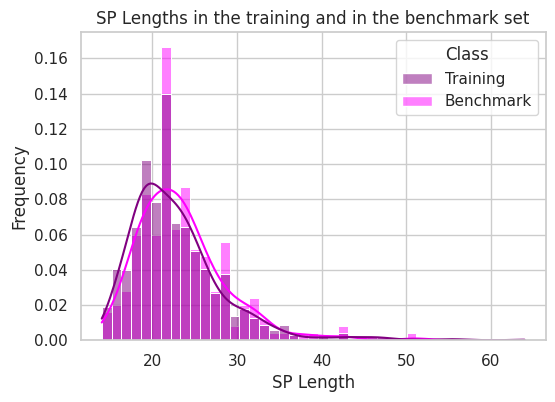

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the distribution of protein lengths
plt.figure(figsize=(6, 4))
sns.histplot(df_sp_l, kde=True, stat='density', common_norm=False, x='Cleavage', hue='Class', palette=custom_palette[4:])

# Add title and labels
plt.title('SP Lengths in the training and in the benchmark set')
plt.xlabel('SP Length')
plt.ylabel('Frequency')

# Show the plot
plt.show()

3. Comparative amino-acid composition of SPs against some background distribution e.g. amino acid composition of SwissProt


In [ ]:
#Retrieve the SP sequences for the train and for the bench

with open('positive.fasta', 'r') as read:
  with open('train_SP.seq', 'w') as write:
    for line in read:
      if '>' in line:
        line = line[1:].rstrip()
        query = pos_train.query("ID == @line")['Cleavage']
        if not query.empty:
          end = int(query.iloc[0])
          line = read.readline()
          print(line[:end+1], file=write)
  write.close
read.close

with open('positive.fasta', 'r') as read:
  with open('bench_SP.seq', 'w') as write:
    for line in read:
      if '>' in line:
        line = line[1:].rstrip()
        query = pos_bench.query("ID == @line")['Cleavage']
        if not query.empty:
          end = int(query.iloc[0])
          line = read.readline()
          print(line[:end+1], file=write)
  write.close
read.close

<function TextIOWrapper.close()>

In [ ]:
# Create a dictionary with the frequencies of each character for the training set

# Count all the characters
with open('train_SP.seq', 'r') as file:
  tot = 0
  aa = {}
  for line in file:
    line = line.rstrip()
    for char in line:
      tot += 1
      aa[char] = aa.get(char, 0) + 1
file.close

print(tot)

# Divide the counts by the number of characters to have the frequencies
for k in aa.keys():
  aa[k] = round((aa[k]/(tot-aa['X']))*100,2)
  print(k,aa[k])

20683
M 6.15
G 5.94
L 21.7
Q 2.3
T 4.33
K 2.34
W 1.83
P 4.04
S 7.43
H 1.17
A 14.39
F 4.86
I 4.46
Y 1.1
V 8.06
C 2.81
R 3.3
N 1.09
E 1.54
D 1.14
X 0.05


In [ ]:
# Create a dictionary with the frequencies of each character for the training set

# Count all the characters
with open('bench_SP.seq', 'r') as file:
  tot = 0
  aa = {}
  for line in file:
    line = line.rstrip()
    for char in line:
      tot += 1
      aa[char] = aa.get(char, 0) + 1
file.close

print(tot)

# Divide the counts by the number of characters to have the frequencies
for k in aa.keys():
  aa[k] = round((aa[k]/(tot))*100,2)
  print(k,aa[k])

5293
{'M': 319, 'A': 755, 'G': 337, 'L': 1094, 'S': 419, 'R': 166, 'T': 261, 'V': 437, 'P': 195, 'K': 115, 'Y': 57, 'I': 236, 'F': 277, 'Q': 118, 'C': 159, 'E': 97, 'W': 77, 'D': 52, 'N': 58, 'H': 64}
M 6.03
A 14.26
G 6.37
L 20.67
S 7.92
R 3.14
T 4.93
V 8.26
P 3.68
K 2.17
Y 1.08
I 4.46
F 5.23
Q 2.23
C 3.0
E 1.83
W 1.45
D 0.98
N 1.1
H 1.21


In [ ]:
# List all the aa
print(aa.keys())

dict_keys(['M', 'A', 'G', 'L', 'S', 'R', 'T', 'V', 'P', 'K', 'Y', 'I', 'F', 'Q', 'C', 'E', 'W', 'D', 'N', 'H'])


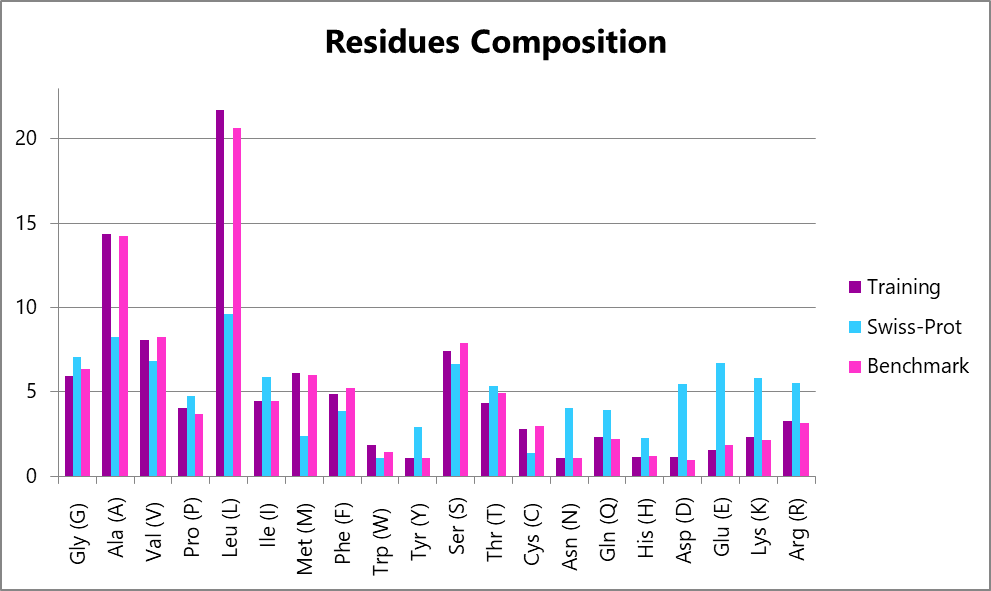

4. Taxonomic classification (at kingdom and species levels)
* Kingdom

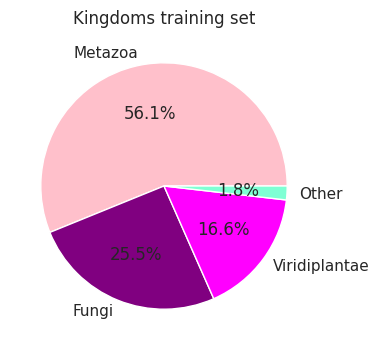

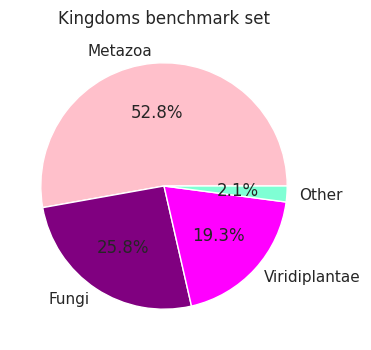

In [ ]:
# Count the values for each kingdom in each set
king_train = train_df['Kingdom'].value_counts()
king_bench = bench_df['Kingdom'].value_counts()
#print(count)

# Plot a pie chart
king_train.plot.pie(autopct='%1.1f%%', figsize=(4, 4), title='Kingdoms training set', colors=custom_palette[3:])
plt.ylabel('')  # Remove y-axis label
plt.show()

king_bench.plot.pie(autopct='%1.1f%%', figsize=(4, 4), title='Kingdoms benchmark set', colors=custom_palette[3:])
plt.ylabel('')  # Remove y-axis label
plt.show()

* Species

In [ ]:
# Count the values for each kingdom in each set
species_train = train_df['Species'].value_counts()
species_bench = bench_df['Species'].value_counts()

# Select the top 10 elements
train_plot = species_train.head(7)
bench_plot = species_bench.head(7)

# Group the remaining elements into 'Others'
other_train = sum(species_train[7:])
other_bench =sum(species_bench[7:])
result_train = pd.concat([train_plot, pd.Series({'Others': other_train})])
result_bench = pd.concat([bench_plot, pd.Series({'Others': other_bench})])


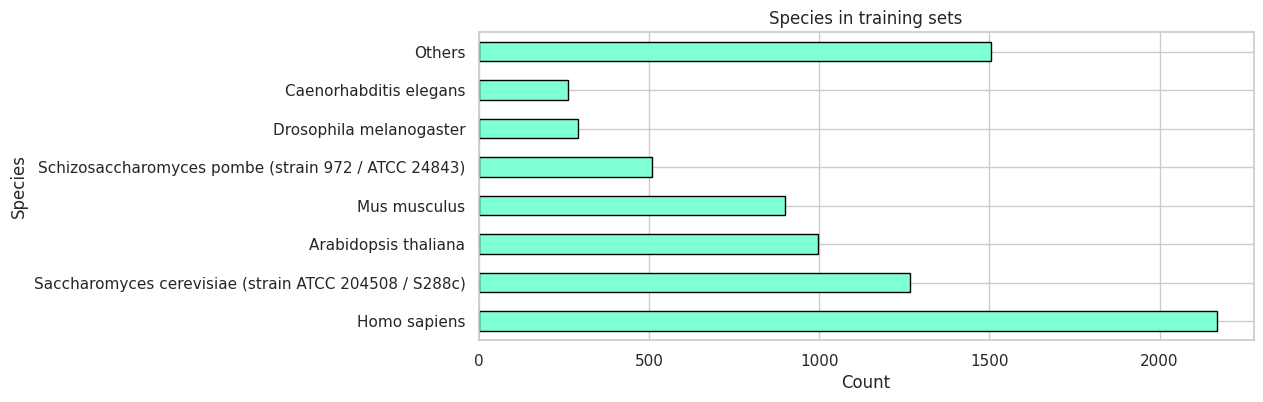

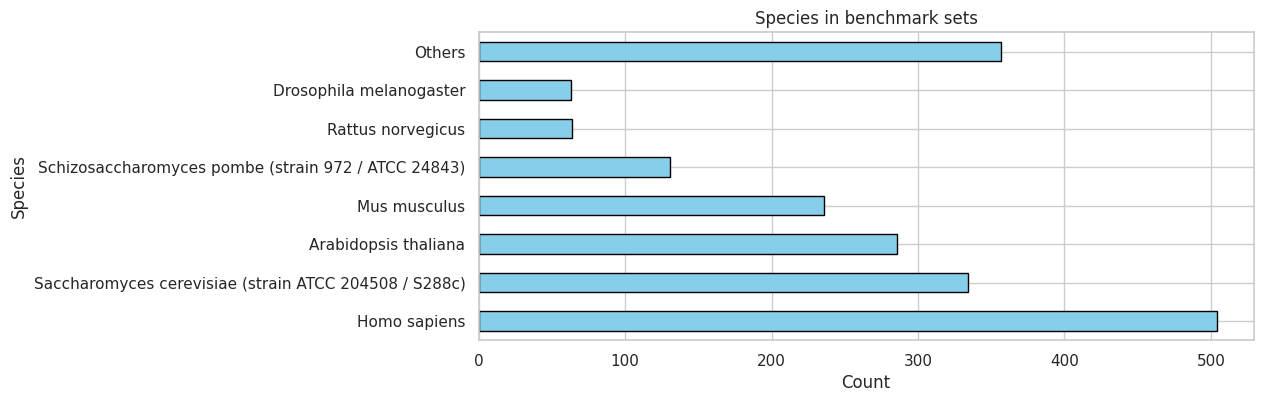

In [ ]:
# Plot the bar plot
result_train.plot(kind='barh', color='#7FFFD4', figsize=(10,4), edgecolor='black')

# Add title and labels
plt.title('Species in training sets')
plt.xlabel('Count')
plt.ylabel('Species')
# Show the plot
plt.show()

# Plot the bar plot
result_bench.plot(kind='barh', color='skyblue', figsize=(10,4), edgecolor='black')
# Add title and labels
plt.title('Species in benchmark sets')
plt.xlabel('Count')
plt.ylabel('Species')
# Show the plot
plt.show()

5. Sequence logos of SP cleavage sites

In [ ]:
# Extract the region of interest and put it in a dedicated file

with open('positive.fasta', 'r') as read:
  with open('train_logo.seq', 'w') as write:
    for line in read:
      if '>' in line:
        line = line[1:].rstrip()
        # Search for the ids in the training set in the fasta file to retrieve the sequence
        query = pos_train.query("ID == @line")['Cleavage']
        if not query.empty: # If the id is found
          # Extract the point of the cleavage site
          end = int(query.iloc[0])
          line = read.readline()
          # Extract the region around the cleavage site
          print(line[end-13:end+2], file=write)
  write.close
read.close

with open('positive.fasta', 'r') as read:
  with open('bench_logo.seq', 'w') as write:
    for line in read:
      if '>' in line:
        line = line[1:].rstrip()
        # Search for the ids in the benchmark set in the fasta file to retrieve the sequence
        query = pos_bench.query("ID == @line")['Cleavage']
        if not query.empty: # If the id is found
          # Extract the point of the cleavage site
          end = int(query.iloc[0])
          line = read.readline()
          # Extract the region around the cleavage site
          print(line[end-13:end+2], file=write)
  write.close
read.close

<function TextIOWrapper.close()>

In [ ]:
aa_list = ['M', 'A', 'G', 'L', 'S', 'R', 'T', 'V', 'P', 'K', 'Y', 'I', 'F', 'Q', 'C', 'E', 'W', 'D', 'N', 'H','X']

The Logos are done with WebLogo

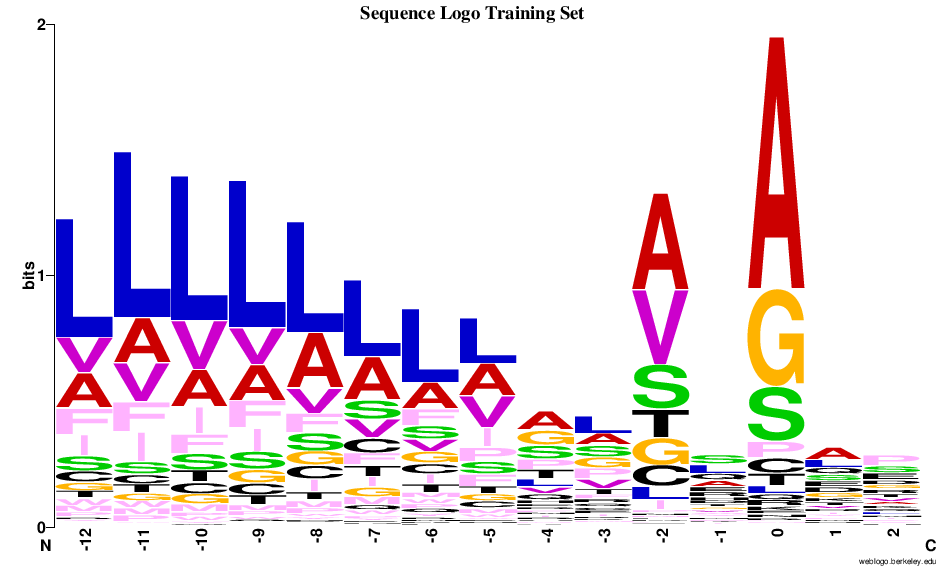

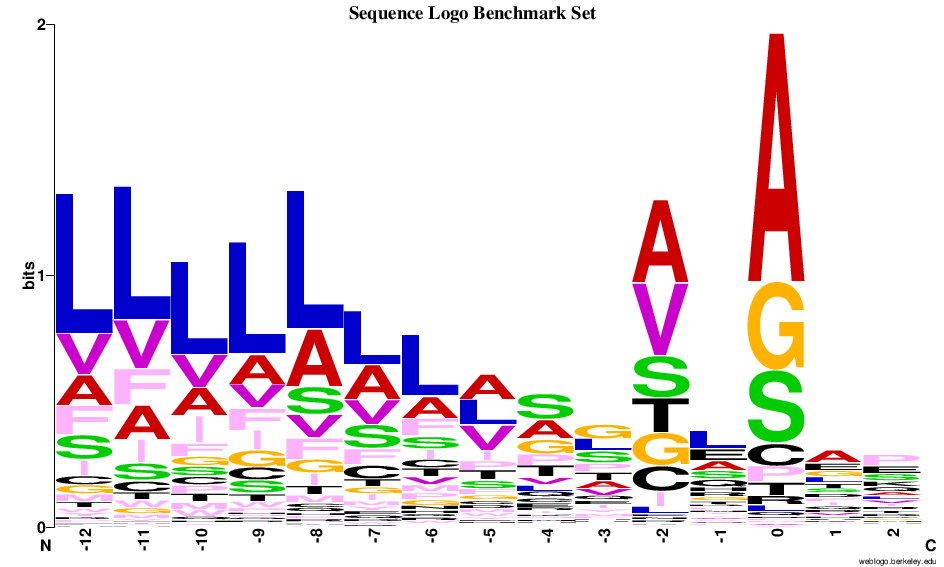

1. pink:
* FWY -> aromatic
* GAVPLIM -> apolar
  2. (V: purple
  3. G: orange
  4. A: red
  5. L: blue)
6. black:
* DEKR -> charged
* STCNQH -> polar
  7. (S: green)
